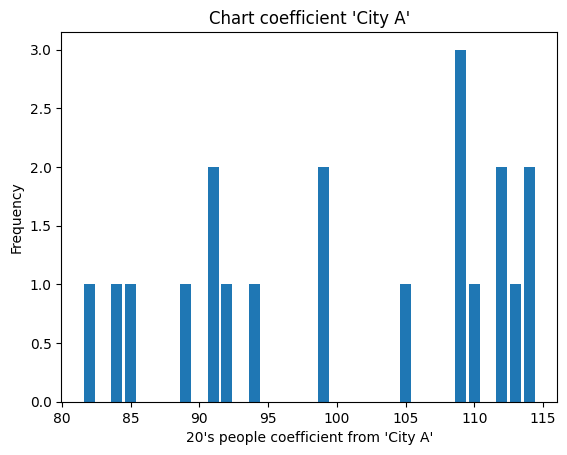

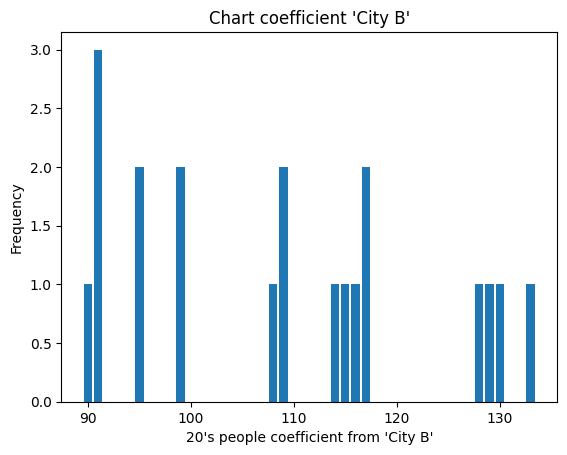

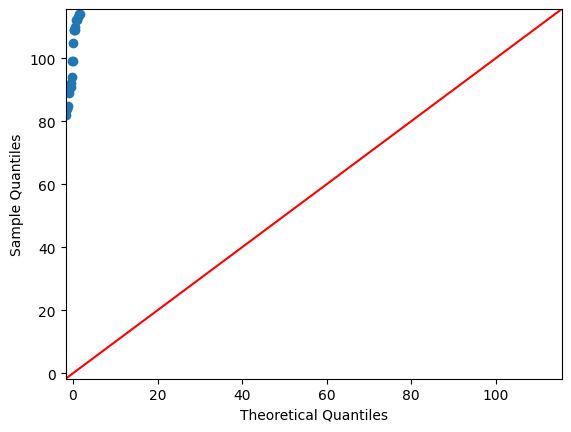

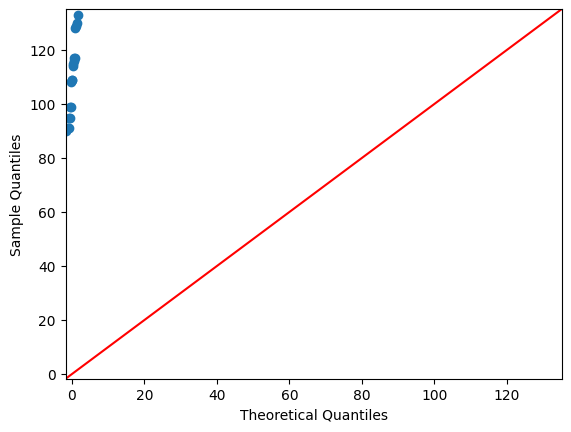

confidence:  0.8872266411781311
p-value for 'City A' is:  0.023922033607959747
confidence:  0.9162791967391968
p-value for 'City B' is:  0.08403971791267395
T-test    [-3.427802982173647, 3.3386327423078677]
Name: CI97%, dtype: object
Prueba de estadística de Levene: 0.9783337282914106
P-value: 0.32886713119968136


In [10]:
from scipy.stats import levene
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import pylab as py
import statsmodels.api as sm

# Read the data
cityA = pd.Series([82, 84, 85, 89, 91, 91, 92, 94, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 114])
cityB = pd.Series([90, 91, 91, 91, 95, 95, 99, 99, 108, 109, 109, 114, 115, 116, 117, 117, 128, 129, 130, 133])

plt.figure()
plt.bar(cityA.unique(), cityA.value_counts(sort=False))
plt.title("Chart coefficient 'City A'")
plt.xlabel("20's people coefficient from 'City A'")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.bar(cityB.unique(), cityB.value_counts(sort=False))
plt.title("Chart coefficient 'City B'")
plt.xlabel("20's people coefficient from 'City B'")
plt.ylabel("Frequency")
plt.show()

# display the 45º line
sm.qqplot(cityA, line='45')
py.show()

sm.qqplot(cityB, line='45')
py.show()

# Ho: normalidad
# Ha: no normalidad
# Regla de decisión: Si el p-value es mayor o igual a mi alpha (probailidad de equovocarme) entonces NO RECHAZO H0.

phnorm_A = shapiro(cityA)
print("confidence: ", phnorm_A[0])
print("p-value for 'City A' is: ", phnorm_A[1])
phnorm_B = shapiro(cityB)
print("confidence: ", phnorm_B[0])
print("p-value for 'City B' is: ", phnorm_B[1])

ic = pg.ttest(phnorm_A, phnorm_B, paired=False, confidence=0.97)
print(ic['CI97%'])

stat, p_value = levene(cityA, cityB)

print(f"Prueba de estadística de Levene: {stat}") # It's not the same variability between the two samples
print(f"P-value: {p_value}") # Probabilidad de que la diferencia entre las varianzas sea por azar, es bajo porqué no es la misma varianza

# ¿Cuáles son las conclusiones? ¿Cuáles fueron los supuestos que hiciste? Cómo sabemos, si el p-value es mayor o igual a mi alpha (probailidad de equovocarme) entonces NO RECHAZO H0, es decir que la distribución es normalo más bien dicho, hay 'Normalidad' en la distribución de los datos, sin embargo esto no sucede a menudo.
# En este caso esspecifico, estás 20 personas de cada ciudad, es solo una pequeña muestra y no pueden representar a toda la ciudad como tal, por lo que podemos decir que la distribución de los datos no es normal, ya que en ambos casos no es una muestra representativa de la población total de la ciudad. 
# Ahora, en cuánto a los resultados la muestra de la ciudad B es la de mayor coeficiente aparentemente, no obstante no podemos declararlo como verdad absoluta ya que su nivel de confianza es alto. Y cómo sabemos, las gráficas no son fucientes porqué a primera vista se ven prácticamente iguales, no obstante tener en cuenta al 'alpha' y al 'p-value' nos ayudan a tener una mejor visión de los datos.